In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\Brasilian _house to rent\\Houses-to-rent-master\\houses_to_rent_v2.csv',
                             sep=r'\s*,\s*',
                            engine='python',
                            na_values="?")
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
target = df['rent amount (R$)'].values
target

array([ 3300,  4960,  2800, ...,  6000, 12000,  1400], dtype=int64)

<AxesSubplot:ylabel='Count'>

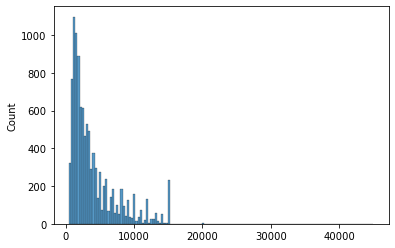

In [5]:
import seaborn as sns

sns.histplot(target)

In [6]:
df=df.drop('rent amount (R$)', axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,279,155,14020


In [7]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
data = oh.fit_transform(df)
data

<10692x9482 sparse matrix of type '<class 'numpy.float64'>'
	with 128304 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm

In [9]:
rf = RandomForestRegressor()
cross_val_score(rf, data, target).mean()

0.765899416552388

In [10]:
rf = RandomForestRegressor(random_state = 42)
cross_val_score(rf, data, target).mean()

0.7678127964795525

In [11]:
from sklearn.preprocessing import MaxAbsScaler
mm = MaxAbsScaler()
data1 = mm.fit_transform(data)
data1

<10692x9482 sparse matrix of type '<class 'numpy.float64'>'
	with 128304 stored elements in Compressed Sparse Row format>

In [12]:
lreg = LinearRegression()
cross_val_score(lreg, data1, target).mean()

0.4481978111282783

In [13]:
nnet = MLPRegressor(
    hidden_layer_sizes=(60, 20),
    solver='lbfgs',
    alpha=0.02
)
cross_val_score(nnet, data1, target).mean()

C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

0.9381935197182267

In [14]:
dt = tree.DecisionTreeRegressor()
cross_val_score(dt, data1, target).mean()

0.6968894359856184

In [15]:
dt.fit(data1, target)
dt.feature_importances_

array([0.00017886, 0.00032585, 0.00053928, ..., 0.        , 0.        ,
       0.        ])

In [16]:
dt.feature_importances_ > 0

array([ True,  True,  True, ..., False, False, False])

In [17]:
data1[:, dt.feature_importances_ > 0]

<10692x1955 sparse matrix of type '<class 'numpy.float64'>'
	with 112779 stored elements in Compressed Sparse Row format>

In [18]:
data1[:, dt.feature_importances_ > 0].shape

(10692, 1955)

In [19]:
data3 = data1[:, dt.feature_importances_ > 0.0005]

In [20]:
cross_val_score(rf, data3, target).mean()

0.808150171404743

In [21]:
cross_val_score(nnet, data3, target).mean()

C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

0.9047619994966386

In [22]:
cross_val_score(dt, data3, target).mean()

0.7762022458246436

I have successfully use cross-validation to evaluate some estimators performance.

I also explored feature importances, and analysed the behaviour of new dataset we ve obtained.

New dataset perform better when i decided again to explore model selection.

MLPRegressor model performe the best on  new dataset.